# Data analysis project on IPL data from 2008-2020


The IPL this year is over, but let's not stop our love for cricket and use the most recent and comprehensive data to analyze the entire IPL. The two datasets includes match descriptions, results, winners, players of the matches, ball by ball datasets, etc. It's time to start analyzing.

The data has been sourced from :- https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020

There are two CSV files in this dataset: matches and deliveries. In these files, you will find match summary information as well as ball-by-ball details.

To start out project we have to import pandas, numpy, matplotlib and seaborn library and change the directory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir('C:\\Users\\Subhadeep Sarkar\\Downloads')

In [2]:
#loading data into pandas
match_df = pd.read_csv("matches.csv")
ball_df = pd.read_csv("deliveries.csv")

# Studying the dataset

Before jumping into analysis, we must study the data and make sense out of it.

In [3]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
ball_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


Checking the number of null values

we will work on the null values when when it is connected to the analysis.

In [5]:
match_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
match_df.columns


Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
ball_df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [8]:
ball_df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [9]:
#To show only count of Columns,Here [0] is used
print ('Matches played so far: ', match_df.shape[0])
##\n is used to make a new line
print ('\n Cities played at so far: ','\n', match_df["city"].unique()) 
print ('\n Teams Participated :', '\n', match_df['team1'].unique())


Matches played so far:  816

 Cities played at so far:  
 ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams Participated : 
 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [10]:

#Set year from one column of date in to a new column.
match_df['Season'] = pd.DatetimeIndex(match_df['date']).year 
match_df.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008


In [11]:
#Reset_Index helps make it into a dataframe
match_per_season = match_df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'}) 
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Matches Played Per Season')

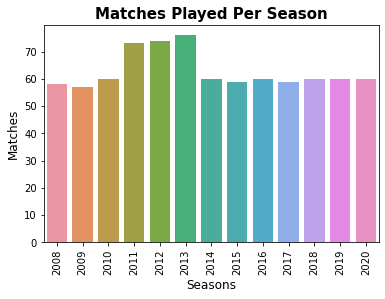

In [12]:
# #Plotting countplot and stylizing the labels
sns.countplot(match_df['Season'])
plt.xticks(rotation = 90, fontsize = 10) 
plt.yticks(fontsize = 10) #Stylize X axis.
plt.xlabel('Seasons', fontsize  = 12 ) 
plt.ylabel('Matches', fontsize = 12) 
plt.title('Matches Played Per Season', fontsize = 15, fontweight = 'bold')

In [13]:
#Making a new data set season by putting Season from Match data in Ball data, by ID.
seasons = match_df[['id', 'Season']].merge(ball_df, left_on= 'id',right_on = 'id', how = 'left')

In [14]:
seasons.head(3)

,id,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [15]:
seasons = seasons.drop('id', axis=1)
seasons.head(3)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [16]:
#Plot a lineplot to show runs scored across seasons.
runs_season=seasons.groupby(['Season'])['total_runs'].sum().reset_index() #Make a new list of grouping total runs per season. 
rs=runs_season.set_index('Season') #Set_index to convert it to a dataframe.
rs

,total_runs
Season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


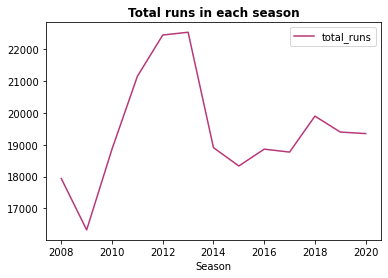

In [17]:
#plotting the trends of runs scored in each edition
sns.lineplot(data=rs,palette="magma") #Line colour 
plt.title('Total runs in each season',fontsize=12,fontweight="bold") #Stylize Title
plt.show()

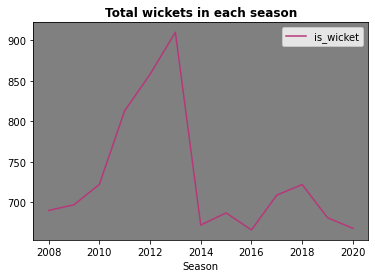

In [18]:
#Plot a lineplot to show wickets across seasons.
wickets_season=seasons.groupby(['Season'])['is_wicket'].sum().reset_index() #Make a new list of grouping total runs per season. 
ws=wickets_season.set_index('Season') #Set_index to convert it to a dataframe.
ax = plt.axes()
ax.set(facecolor = "Grey") #BG Colour
sns.lineplot(data=ws,palette="magma") #Line colour 
plt.title('Total wickets in each season',fontsize=12,fontweight="bold") #Stylize Title
plt.show()

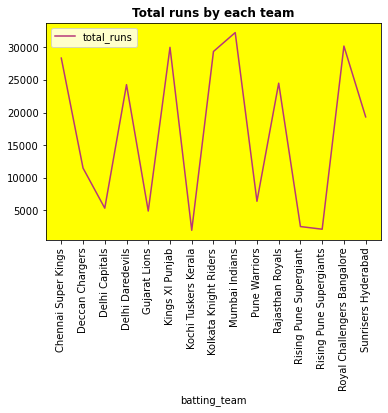

In [19]:
#Plot a lineplot to show runs across teams.
team_runs=seasons.groupby(['batting_team'])['total_runs'].sum().reset_index() #Make a new list of grouping total runs per season. 
tr=team_runs.set_index('batting_team') #Set_index to convert it to a dataframe.
ax = plt.axes()
ax.set(facecolor = "yellow") #BG Colour
sns.lineplot(data=tr,palette="magma") #Line colour 
plt.xticks(rotation = 90)
plt.title('Total runs by each team',fontsize=12,fontweight="bold") #Stylize Title
plt.show()

Text(0, 0.5, 'Total Wickets')

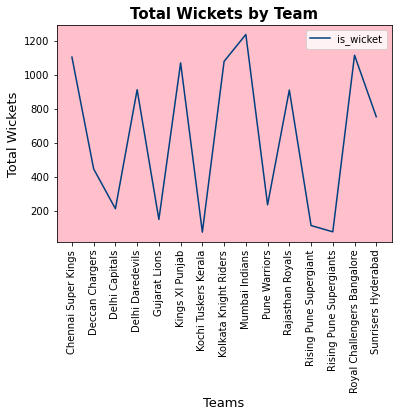

In [20]:
#Plot a lineplot to show runs across teams.
wickets_team = seasons.groupby(['bowling_team'])['is_wicket'].sum().reset_index()
wt = wickets_team.set_index('bowling_team')
ax = plt.axes()
ax.set(facecolor = 'pink')
sns.lineplot(data = wt, palette = 'ocean_r')
plt.title('Total Wickets by Team', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation=90)
plt.xlabel('Teams', fontsize = 13 )
plt.ylabel('Total Wickets', fontsize = 13)

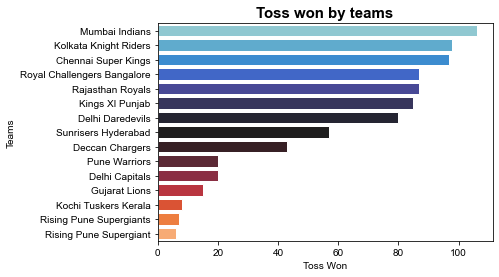

In [21]:
#Plot a barplot to show toss won per team.
toss = match_df['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'white')
sns.set(rc={'figure.figsize':(10,5)}, style= 'darkgrid')
sns.barplot(y=toss.index, x=toss, orient='h', palette = 'icefire', saturation = 1)
plt.title('Toss won by teams', fontsize = 15, fontweight = 'bold')
plt.xlabel('Toss Won')
plt.ylabel('Teams')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

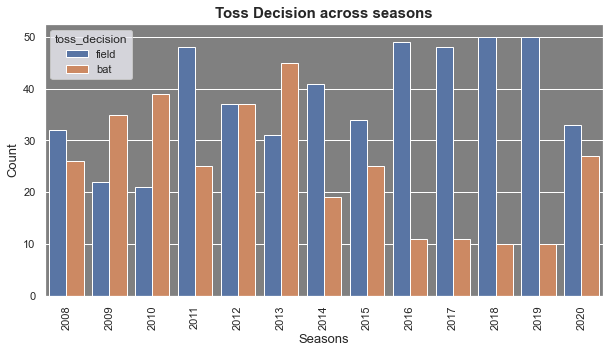

In [22]:
ax = plt.axes()
ax.set(facecolor='Grey')
sns.set({'figure.figsize':(10,5)}, style = 'darkgrid')
sns.countplot(x='Season', hue = 'toss_decision', data= match_df)
plt.xlabel('Seasons', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Toss Decision across seasons', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90)


In [23]:
#How many matches each team won after winning and loosing toss.
twmw = match_df['toss_winner'] == match_df['winner']
twmw

0      False
1       True
2      False
3      False
4      False
       ...  
811    False
812    False
813     True
814     True
815    False
Length: 816, dtype: bool

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


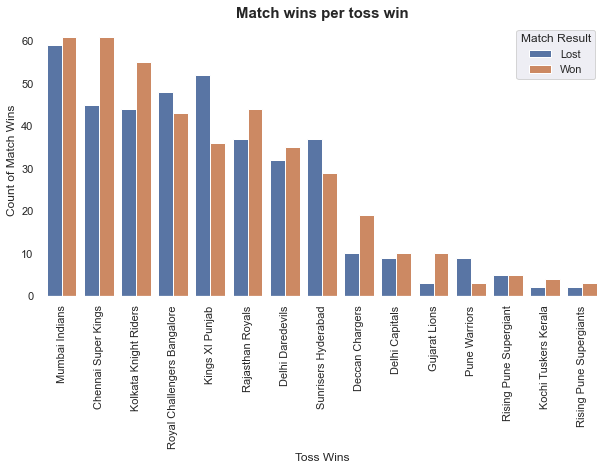

In [34]:
#Plotting the data here
ax = plt.axes()
ax.set(facecolor='white')
sns.set({'figure.figsize':(10,5)}, style = 'darkgrid')
sns.countplot(match_df['winner'], hue=twmw, order = match_df['winner'].value_counts().index) #Order the countplot with value counts.
plt.xticks(rotation = 90)
plt.xlabel('Toss Wins')
plt.ylabel('Count of Match Wins')
plt.title('Match wins per toss win', fontsize = 15, fontweight = 'bold')
plt.legend(title='Match Result', loc='upper right', labels=('Lost','Won'))

Apparently Kings XI punjab and Pune Warriors lost many matches despite winning tosses. Was the captain unable to make right decisions? one can presume so. 

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Toss Decision per Team')

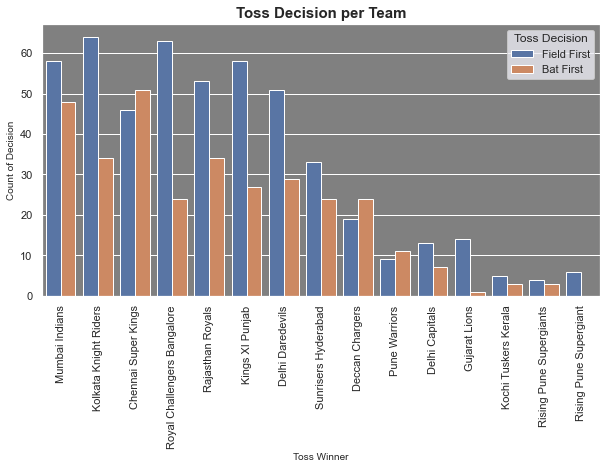

In [25]:
#What was decision of teams after winning toss?
ax = plt.axes()
ax.set(facecolor='Grey')
sns.set({'figure.figsize':(10,5)}, style = 'darkgrid')
sns.countplot(match_df['toss_winner'], hue=match_df['toss_decision'], order = match_df['toss_winner'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title = 'Toss Decision', loc = 'upper right',labels = ['Field First', 'Bat First'])
plt.xlabel('Toss Winner', fontsize = 10)
plt.ylabel('Count of Decision', fontsize = 10)
plt.title('Toss Decision per Team', fontsize = 15, fontweight = 'bold')

In [26]:

ball_df['dismissal_kind'].fillna('Not a Wicket', inplace = True)
ball_df.dismissal_kind.unique()

array(['Not a Wicket', 'caught', 'run out', 'bowled', 'lbw',
       'retired hurt', 'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [27]:
yes_bowler_wickets = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
bowler_wickets = ball_df[ball_df['dismissal_kind'].isin(yes_bowler_wickets)]
print('\n Type of Dismissals', '\n' ,bowler_wickets['dismissal_kind'].unique())
bowler_wickets



 Type of Dismissals 
 ['caught' 'bowled' 'lbw' 'stumped' 'caught and bowled' 'hit wicket']


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
32,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,0,1,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
64,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,0,1,caught,DJ Hussey,CL White,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
112,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,0,1,caught,SC Ganguly,JH Kallis,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
132,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,0,1,caught,MV Boucher,M Kartik,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
135,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,0,1,caught,B Akhil,RT Ponting,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193375,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals
193381,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,0,1,caught,AR Patel,AS Roy (sub),NaN,Delhi Capitals,Mumbai Indians
193386,1237181,1,0,1,MP Stoinis,S Dhawan,TA Boult,0,0,0,0,1,caught,MP Stoinis,Q de Kock,NaN,Delhi Capitals,Mumbai Indians
193401,1237181,1,2,4,AM Rahane,S Dhawan,TA Boult,0,0,0,0,1,caught,AM Rahane,Q de Kock,NaN,Delhi Capitals,Mumbai Indians


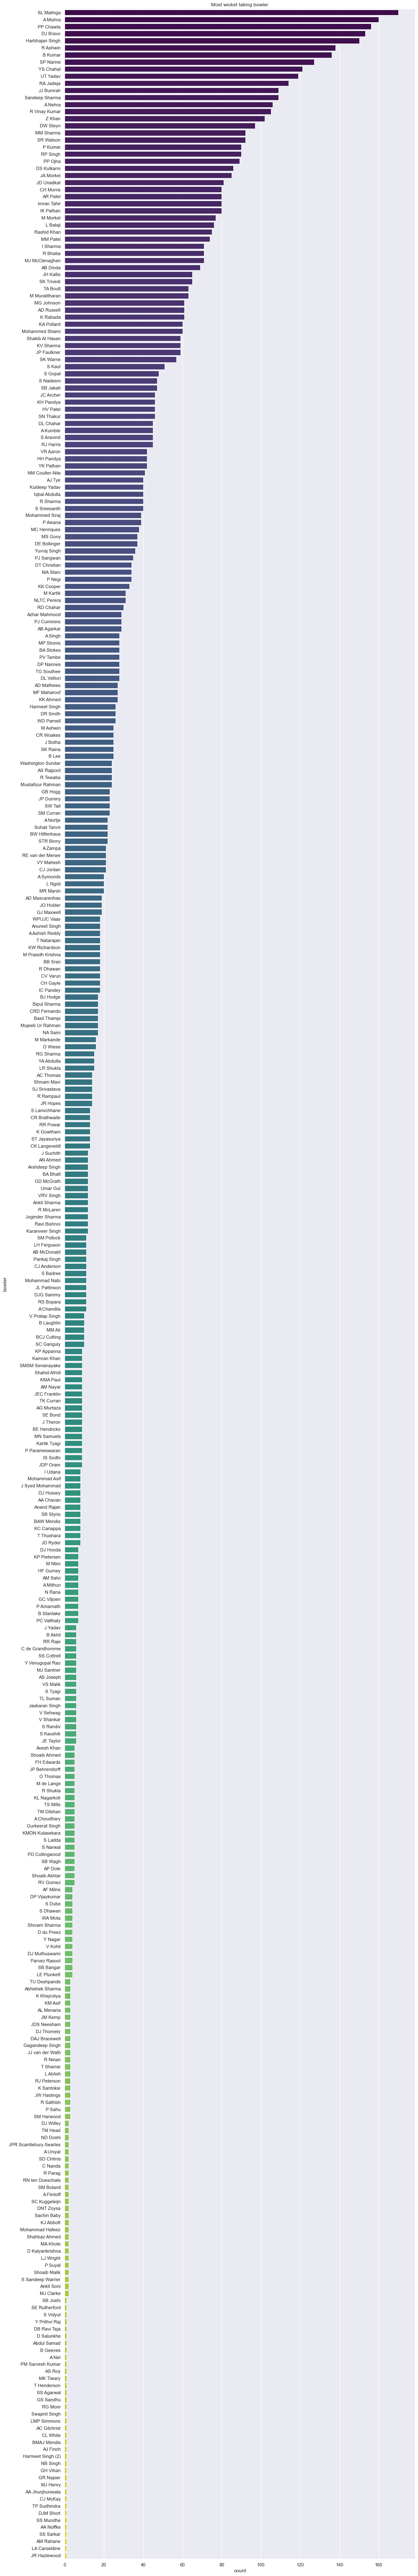

In [28]:
plt.figure(figsize=(15,112))
sns.countplot(y=bowler_wickets['bowler'],
              order = bowler_wickets['bowler'].value_counts().index,palette='viridis')

plt.title('Most wicket taking bowler')
plt.show()

In [29]:
#Drow a pie chart for top 10 wicket taking bowlers.
wickets_bowler = bowler_wickets.groupby(['bowler'])['dismissal_kind'].count().reset_index()
wickets_bowler.columns = ['Bowler', 'Wickets']
y = wickets_bowler.sort_values(by='Wickets', ascending = False).head(10).reset_index().drop('index', axis=1)
y


,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150
5,R Ashwin,138
6,B Kumar,136
7,SP Narine,127
8,YS Chahal,121
9,UT Yadav,119


(array([], dtype=float64), [])

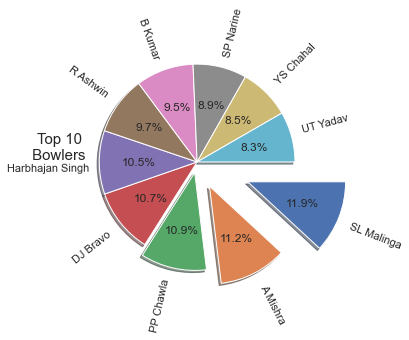

In [30]:
#plotiing a pie chart to show who has been the most effective bowler in IPL
y.set_index(y.Bowler,inplace=True)
y['Wickets'].plot.pie(autopct='%1.1f%%', shadow = True , rotatelabels=True, radius = 0.9,explode=[0.5,0.25,0.1,0,0,0,0,0,0,0],counterclock=False)
plt.ylabel('  Top 10 ' '\n Bowlers',fontsize=15,rotation = 0)
plt.yticks(fontsize=20)



In [31]:
#plotting wickets taken by lowest performing bowlers
x= wickets_bowler.sort_values(by='Wickets', ascending = False).tail(20).reset_index().drop('index', axis=1)
x.set_index(x.Bowler,inplace=True)
x

,Bowler,Wickets
Bowler,,
B Geeves,B Geeves,1
GR Napier,GR Napier,1
GH Vihari,GH Vihari,1
JR Hazlewood,JR Hazlewood,1
BMAJ Mendis,BMAJ Mendis,1
AM Rahane,AM Rahane,1
T Henderson,T Henderson,1
LA Carseldine,LA Carseldine,1
SS Sarkar,SS Sarkar,1


(array([], dtype=float64), [])

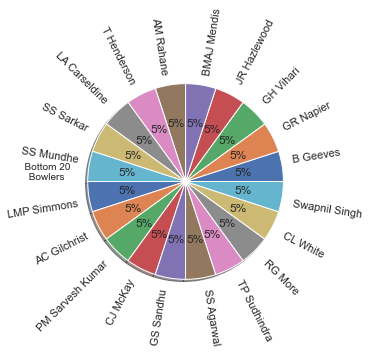

In [32]:
x['Wickets'].plot.pie(autopct='%1.0f%%', shadow = True , rotatelabels=True, radius = 0.9,explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.ylabel('  Bottom 20 ' '\n Bowlers',fontsize=10,rotation = 0)
plt.yticks(fontsize=20)

Text(0.5, 1.0, 'Matches Played in each stadium')

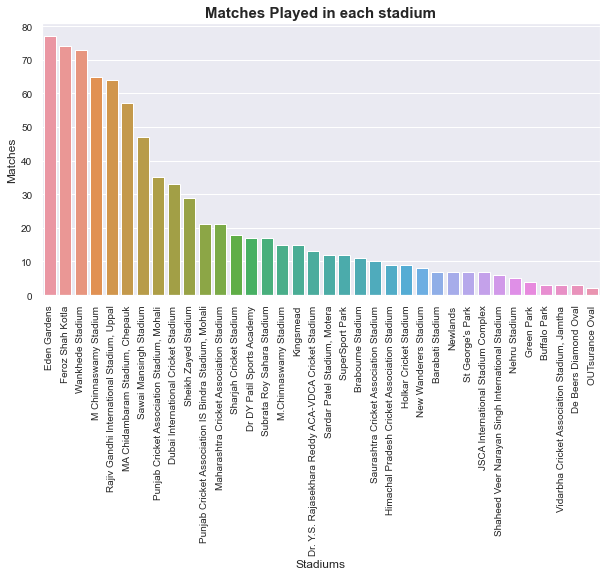

In [37]:
sns.countplot(x = 'venue',
              data = match_df,
              order = match_df['venue'].value_counts().index)
plt.xticks(rotation = 90, fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.xlabel('Stadiums', fontsize  = 12 ) 
plt.ylabel('Matches', fontsize = 12) 
plt.title('Matches Played in each stadium', fontsize = 15, fontweight = 'bold')